## Importing essential modules

In [1]:
import os
import pandas as pd
import plotly.express as px # Importing plotly.express for easy data visualization
import plotly.graph_objects as go # Importing plotly.graph_objects for detailed and customizable data visualizations

from plotly.offline import init_notebook_mode, iplot # Functions to enable plotly in Jupyter notebooks and for interactive plotting
init_notebook_mode(connected=True)

import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs  # Function to generate synthetic datasets for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Function to calculate the silhouette score for evaluating clustering quality
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D # Importing 3D plotting toolkit for creating 3D plots in Matplotlib

## Exploratory Data Analysis 
### 1. Loading the dataset(E_commerce Data) 

In [2]:
df = pd.read_csv('data.csv', encoding='unicode_escape')

df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

### 2. Exploring data characteristics

The dataset, consisting of 541,909 rows and 8 columns, has missing values in certain columns, incorrect data types for InvoiceDate and CustomerID, and negative values in the Quantity and UnitPrice columns.

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### 3. Data Preparation and Cleaning

#### Missing Values
Identified that approximately 140,000 transactions, or 24.93% of the Customer data, have missing Customer information, and 1,500 items, representing 0.27%, have missing descriptions.

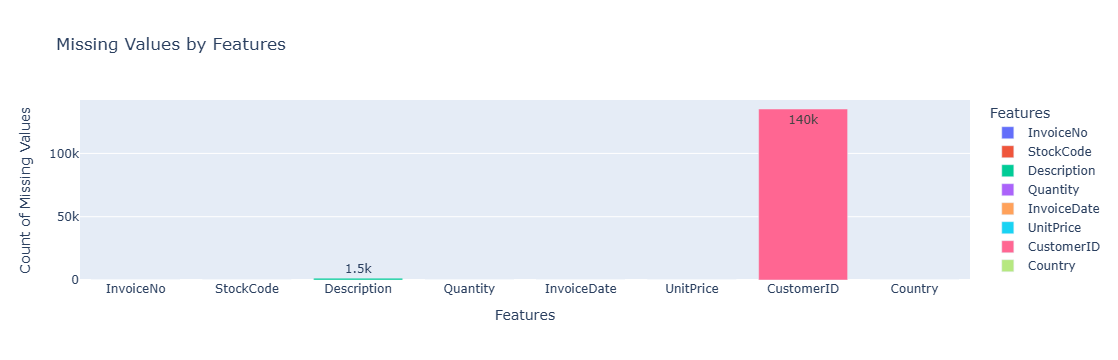

In [6]:
df_msn = pd.DataFrame(df.isna().sum())
df_msn['Features'] = df_msn.index
df_msn['MissingValues'] = df_msn[0]
fig = px.bar(df_msn, 
            title='Missing Values by Features',
             x = 'Features', 
             y = 'MissingValues', 
             color='Features',
            text='MissingValues',
            text_auto='.2s')
fig.update_yaxes(title='Count of Missing Values')

In [7]:
customer_msn = (df['CustomerID'].isna().sum() / len(df['CustomerID'])) * 100
description_msn = (df['Description'].isna().sum() / len(df['CustomerID'])) * 100
print('{:.2f}%, {:.2f}%'.format(customer_msn,description_msn))

24.93%, 0.27%


In [8]:
df.drop(df[df['CustomerID'].isna() | df['Description'].isna()].index, inplace=True)

In [9]:
df.drop(df.query('Quantity < 0').index, inplace=True)

In [10]:
df.drop(df.query('Country == "Unspecified"').index, inplace=True)

In [11]:
df.drop(df.query('Description in ["POSTAGE", "CARRIAGE", "Discount", "DOTCOM POSTAGE", "CRUK Commission", "Manual"]').index, axis=0, inplace=True)

#### Datatype issues

Converting the InvoiceDate and CustomerID columns to their appropriate data types.

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396142 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396142 non-null  object        
 1   StockCode    396142 non-null  object        
 2   Description  396142 non-null  object        
 3   Quantity     396142 non-null  int64         
 4   InvoiceDate  396142 non-null  datetime64[ns]
 5   UnitPrice    396142 non-null  float64       
 6   CustomerID   396142 non-null  int64         
 7   Country      396142 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.2+ MB


In [15]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  396142.000000                         396142  396142.000000   
mean       13.049507  2011-07-11 00:09:54.120290304       2.868079   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 10:43:00       1.250000   
50%         6.000000            2011-07-31 15:00:00       1.950000   
75%        12.000000            2011-10-20 15:15:00       3.750000   
max     80995.000000            2011-12-09 12:50:00     649.500000   
std       180.785427                            NaN       4.265471   

          CustomerID  
count  396142.000000  
mean    15302.566395  
min     12346.000000  
25%     13975.000000  
50%     15159.000000  
75%     16804.000000  
max     18287.000000  
std      1709.631177

## Feature Engineering 

Generating RFM (Recency, Frequency, Monetary) values for customers using the provided data.

### 1. Recency
A Recency column has been added to the dataframe, showing when each customer last made a purchase.

In [16]:
df['Rank'] = df.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)
recent_df = df[df['Rank']==1]

In [17]:
earliest_purchase = pd.to_datetime(min(recent_df['InvoiceDate']))
recent_df['Recency'] = (recent_df['InvoiceDate'] - earliest_purchase).dt.days

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18520\830862436.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
recent_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Rank  Recency  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom     1        0  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom     1        0  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom     1        0  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom     1        0  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom     1        0

### 2. Frequency
We now determine the purchase frequency for each customer by merging the two dataframes.

In [19]:
freq = recent_df.groupby('CustomerID')['InvoiceDate'].count()
freq_df = pd.DataFrame(freq).reset_index()
freq_df.columns = ['CustomerID', 'Frequency']
freq_df.head()

CustomerID  Frequency
0       12346          1
1       12347         31
2       12348         16
3       12349         72
4       12350         16

In [20]:
rec_freq = freq_df.merge(recent_df, on= 'CustomerID')
rec_freq.head()

CustomerID  Frequency InvoiceNo StockCode  \
0       12346          1    541431     23166   
1       12347         31    537626     85116   
2       12347         31    537626     22375   
3       12347         31    537626     71477   
4       12347         31    537626     22492   

                         Description  Quantity         InvoiceDate  UnitPrice  \
0     MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00       1.04   
1    BLACK CANDELABRA T-LIGHT HOLDER        12 2010-12-07 14:57:00       2.10   
2  AIRLINE BAG VINTAGE JET SET BROWN         4 2010-12-07 14:57:00       4.25   
3  COLOUR GLASS. STAR T-LIGHT HOLDER        12 2010-12-07 14:57:00       3.25   
4            MINI PAINT SET VINTAGE         36 2010-12-07 14:57:00       0.65   

          Country  Rank  Recency  
0  United Kingdom     1       48  
1         Iceland     1        6  
2         Iceland     1        6  
3         Iceland     1        6  
4         Iceland     1        6

### 3. Monetary Value
We now assess the monetary value for each user to understand their total spending on the platform.

In [21]:
rec_freq['Total'] = rec_freq['Quantity'] * rec_freq['UnitPrice']
m = rec_freq.groupby('CustomerID')['Total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID', 'MonetaryValue']
m.head()

CustomerID  MonetaryValue
0       12346       77183.60
1       12347         711.79
2       12348         652.80
3       12349        1457.55
4       12350         294.40

In [22]:
rfm = m.merge(rec_freq, on='CustomerID')
final_df = rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']]
final_df.head()

CustomerID  Recency  Frequency  MonetaryValue
0       12346       48          1       77183.60
1       12347        6         31         711.79
2       12347        6         31         711.79
3       12347        6         31         711.79
4       12347        6         31         711.79

### 4. Removing Outliers
This includes identifying and removing of outliers. A boxplot will be used to visually detect these outliers.

Recency shows no visible outliers in these plots, but Frequency and Monetary Value have several. Thus it includes elimination of data points with a Z-Score of 3 or more, as values this far from the mean in a normal distribution are rare and likely outliers.

Recency: 


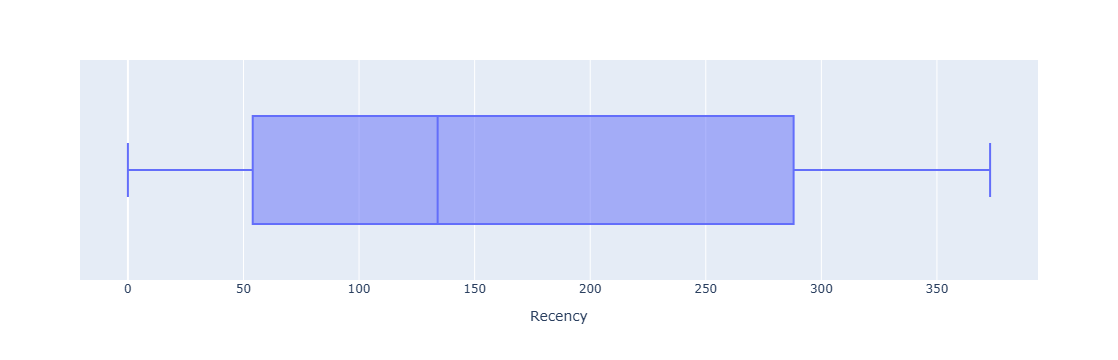

Frequency: 


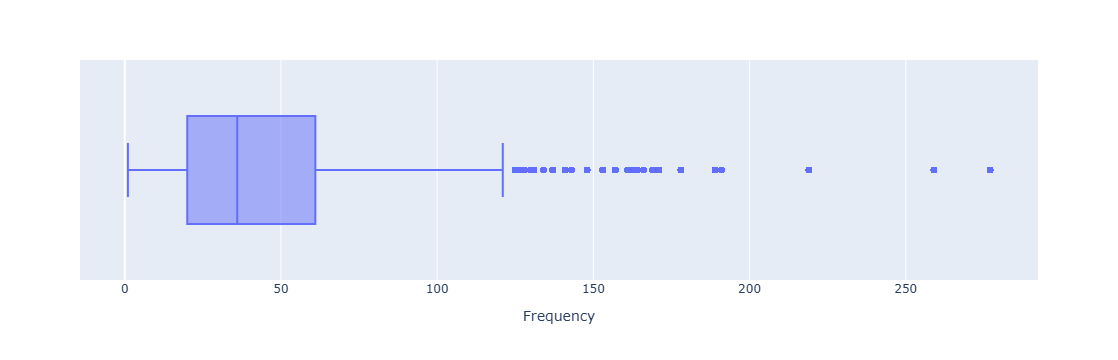

MonetaryValue: 


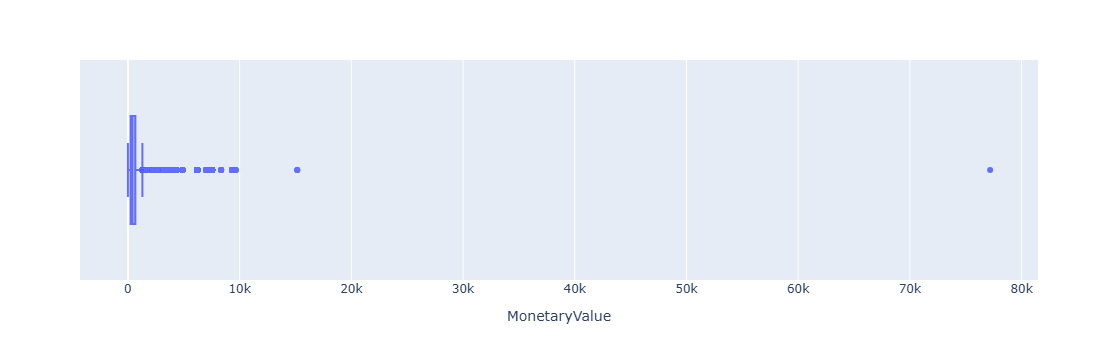

In [23]:
features  = ['Recency', 'Frequency', 'MonetaryValue']

for i in features:
    print(str(i)+': ')
    fig = px.box(final_df,
                x = final_df[i])
    fig.show()

In [24]:
new_df = final_df[['Recency', 'Frequency', 'MonetaryValue']]
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
abs_z_scores.head()

Recency  Frequency  MonetaryValue
0  0.936717   1.156793     100.268876
1  1.282132   0.408995       0.157183
2  1.282132   0.408995       0.157183
3  1.282132   0.408995       0.157183
4  1.282132   0.408995       0.157183

In [25]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]
new_df.head()

Recency  Frequency  MonetaryValue
1        6         31         711.79
2        6         31         711.79
3        6         31         711.79
4        6         31         711.79
5        6         31         711.79

### 5. Standardization
Standardization is the last pre-processing technique applied.

In [26]:
new_df = new_df.drop_duplicates()
col_names = ['Recency', 'Frequency', 'MonetaryValue']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)

scaled.head()

Recency  Frequency  MonetaryValue
0 -1.222734   0.347523       1.013043
1 -1.146326  -0.340100       0.837127
2  1.740215   2.227025       3.236994
3 -0.738814  -0.340100      -0.231667
4 -0.619957  -0.385941      -0.225405

### 6. PCA
 Reduce noise and accentuate the most important aspects of the data.

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

## Developing the customer segmentation model

In [28]:
SSE = []
for cluster in range(1,10):
    #for n_init in range(10,1):
        kmeans = KMeans(n_clusters = cluster, init='k-means++') # Using K-Means clustering to peform customer segmentation
        kmeans.fit(X_pca)
        SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

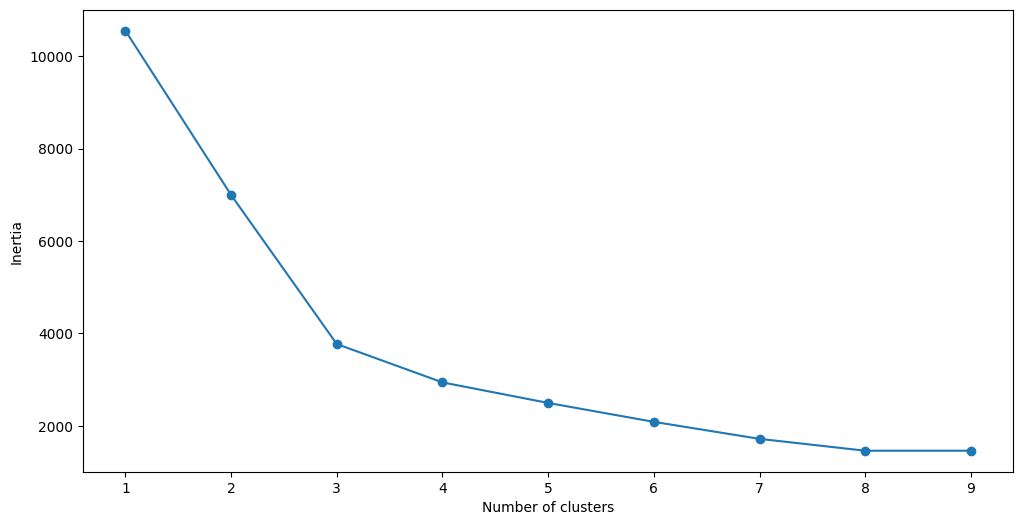

In [29]:
import matplotlib.pyplot as plt

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})# Convertion of the result into a dataframe and visualise
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [30]:
kmeans = KMeans( n_clusters = 3, init='k-means++')# The optimal number of clusters to use in the algorithm is 3
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [31]:
print(silhouette_score(X_pca, kmeans.labels_, metric='euclidean'))# Using the silhouette score to evaluate the performance of this model

0.4586214360069881


## Model Interpretation and Visusalisation

In [32]:
pred = kmeans.predict(X_pca)
frame = pd.DataFrame(new_df)
frame['Cluster'] = pred
frame.head()

Recency  Frequency  MonetaryValue  Cluster
1          6         31         711.79        0
32        15         16         652.80        0
48       355         72        1457.55        1
120       63         16         294.40        0
136       77         15         296.50        0

Recency


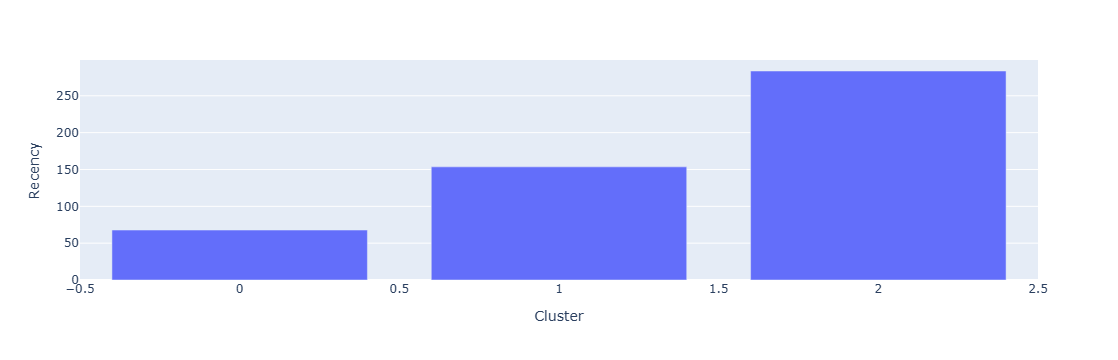

Frequency


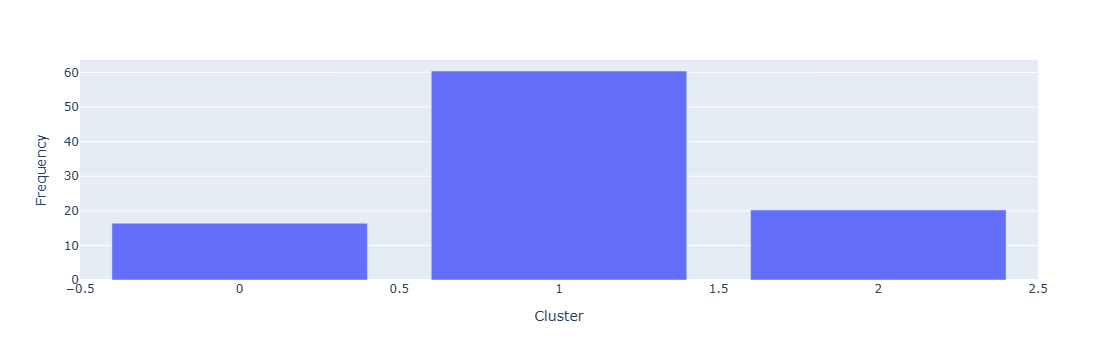

MonetaryValue


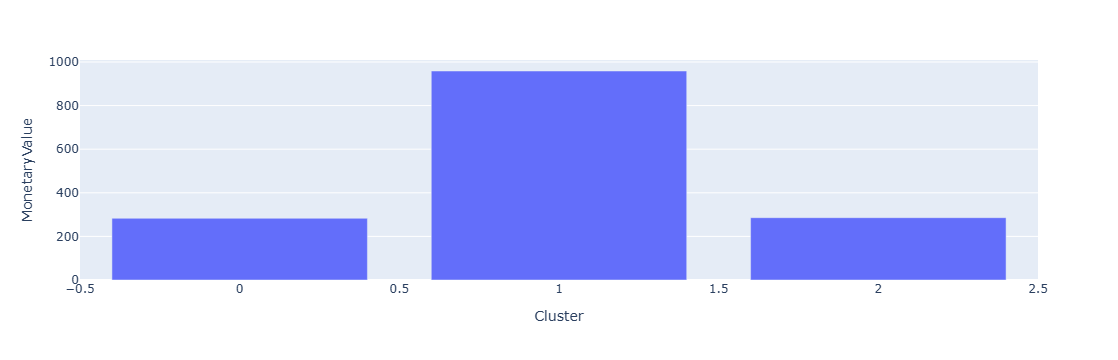

In [33]:
mean_df = frame.groupby(['Cluster'], as_index=False).mean()
for i in col_names:
    print(i)
    fig = px.bar(mean_df,
                x='Cluster',
                y=str(i))# A bar plot to identify the distinct traits of the customers
    fig.show()

## Analysis of the outcomes
#### Cluster-0	
Low-Activity, Occasional Buyers : 

Customers in this segment have low recency, frequency, and monetary value scores. These are people who make occasional purchases and have not engaged recently.

#### Cluster-1	
High-Value, High-Frequency Customers : 

Customers in this segment have moderate recency but high frequency, and monetary value scores, indicating they are high-value, frequent purchasers.

#### Cluster-2	
Low-Engagement, Moderate Spenders : 

Customers in this segment demonstrate high recency but low frequency and monetary value scores. They might make purchases infrequently but have engaged recently.